### interactive viewer of the radlite datacube
### based on https://matplotlib.org/stable/api/animation_api.html

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
from astropy.io import fits  
from astropy.visualization import (AsinhStretch, LogStretch, ImageNormalize)
from matplotlib.animation import FuncAnimation

from IPython.display import HTML
%matplotlib inline

In [2]:
path = "./radlite/"
filename = "radlite_image.fits"

f = fits.open(path+filename)
continuum = f[1].data
line = f[2].data
hd = f[2].header
wave = hd['WAVELEN']    # microns

In [3]:
v = hd['CRVAL3'] + (1 + np.arange(hd['NAXIS3']) - hd['CRPIX3']) * hd['CDELT3']
k0 = 40
k1 = 60
nplot = k1 - k0 + 1
frames = np.linspace(k0, k1, nplot, dtype=int)

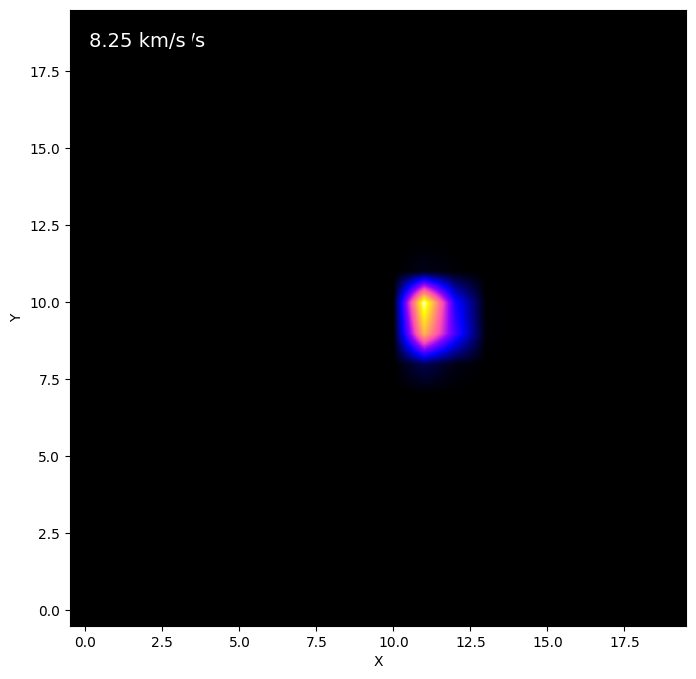

In [4]:
fig, ax = plt.subplots(figsize=(8,8))

k = 45
i1, i2 = 40, 60
j1, j2 = 40, 60
norm = ImageNormalize(np.nanmax(line, axis=0), stretch=AsinhStretch())

# this is needed to initialize animate but unfortunately also creates a separate, static plot under the animation
slice = line[k0,j1:j2,i1:i2]
implt = ax.imshow(slice, cmap='gnuplot2', origin='lower', interpolation='bilinear')
ax.set_xlabel("X")
ax.set_ylabel("Y")

def animate(k):
    implt.set_data(line[k,j1:j2,i1:i2])
    ax.text(0.03, 0.94, f"{v[k]:.2f} km/s", fontsize=14, color='white', backgroundcolor='black', transform = ax.transAxes)
    return implt,

ani = FuncAnimation(fig, animate, frames=frames)
HTML(ani.to_jshtml())
